<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C1/C1.html"><img src="../data/C1_nav.png" width="100"  style="float:right;" alt="C1"></a>
<h1> Dynamics, Intensity, and Loudness</h1>        
</div>

<br />

<p>
Following Section 1.3.3 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we introduce in this notebook concepts related to dynamics, intensity, and loudness.
</p> 

## Decibel Scale

An important property of music concerns the **dynamics**, a general term that is used to refer to the volume of a sound as well as to the musical symbols that indicate the volume. From a physical point of view, **sound power** expresses
how much energy per unit time is emitted by a sound source passing in all directions through the air. The term **sound intensity** is then used to denote the sound power per unit area. In practice, sound power and sound intensity can show extremely small values that are still relevant for human listeners. For example, the **threshold of hearing** (TOH), which is the minimum sound intensity of a pure tone a human can hear, is as small as 

\begin{equation}
I_\mathrm{TOH}:=10^{-12}~\mathrm{W}/\mathrm{m}^2.
\end{equation}

Furthermore, the range of intensities a human can perceive is extremely large with $I_\mathrm{TOP}:=10~\mathrm{W}/\mathrm{m}^2$ being the **threshold of pain** (TOP). For practical reasons,  one switches to a logarithmic scale to express power and intensity. More precisely, one uses a **decibel** (dB) scale, which is a logarithmic unit expressing the ratio between two values. Typically, one of the values serves as a reference, such as $I_\mathrm{TOH}$ in the case of sound intensity. Then the intensity measured in $\mathrm{dB}$ is defined as

\begin{equation}
   \mathrm{dB}(I) := 10\cdot \log_{10}\left(\frac{I}{I_\mathrm{TOH}}\right).
\end{equation}

From this definition, one obtains $\mathrm{dB}(I_\mathrm{TOH})=0$, and a doubling of the intensity results in an increase of roughly $3~\mathrm{dB}$:

\begin{equation}
     \mathrm{dB}(2\cdot I) = 10\cdot \log_{10}(2) + \mathrm{dB}(I) \approx 3 + \mathrm{dB}(I).
\end{equation}

When specifying intensity values in terms of decibels, one also speaks of **intensity levels**. The following table shows some typical intensity values given in $\mathrm{W}/\mathrm{m}^2$ as well as in decibels for some sound sources and dynamics indicators.

<img src="../data/C1/FMP_C1_T01.png" width="400px" align="middle" alt="C1">

## Beethoven Example

We now compute the sound power level (given in decibel) over time of an audio signal. The power is defined to be the signal's (local) energy per time unit. As an example, we consider a music recording of the beginning of Beethoven's Fifth Symphony in an interpretation conducted by Herbert von Karajan (1946). The score is shown in a piano reduced version. 

<img src="../data/C1/FMP_C1_F10_Beethoven_Fifth-MM1-21_Sibelius-Piano.png" width="900px" align="middle" alt="C3">

<br clear="all" />

<audio src="../data/C1/FMP_C1_F10_Beethoven_Fifth-MM1-21_Karajan1946.mp3" type="audio/mpeg" controls="controls"></audio>

In the following figure, we show the waveform of the signal as well as the sound power level over time. As can be seen, the dynamic range of the music recording roughly lies between $75$ and $105~\mathrm{dB}$.

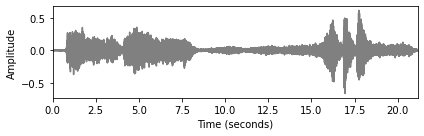

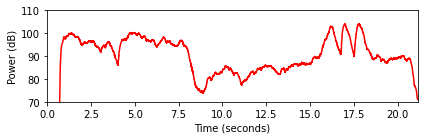

In [1]:
import numpy as np
import scipy
import os
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
import sys
sys.path.append('..')
import libfmp.b
%matplotlib inline

def compute_power_db(x, Fs, win_len_sec=0.1, power_ref=10**(-12)):
    """Computation of the signal power in dB

    Notebook: C1/C1S3_Dynamics.ipynb

    Args:
        x (np.ndarray): Signal (waveform) to be analyzed
        Fs (scalar): Sampling rate
        win_len_sec (float): Length (seconds) of the window (Default value = 0.1)
        power_ref (float): Reference power level (0 dB) (Default value = 10**(-12))

    Returns:
        power_db (np.ndarray): Signal power in dB
    """
    win_len = round(win_len_sec * Fs)
    win = np.ones(win_len) / win_len
    power_db = 10 * np.log10(np.convolve(x**2, win, mode='same') / power_ref)
    return power_db

fn_wav = os.path.join('..', 'data', 'C1', 'FMP_C1_F10_Beethoven_Fifth-MM1-21_Karajan1946.wav')
Fs = 22050
x, Fs = librosa.load(fn_wav, sr=Fs, mono=True)

win_len_sec = 0.2
power_db = compute_power_db(x, win_len_sec=win_len_sec, Fs=Fs)

libfmp.b.plot_signal(x, Fs=Fs, ylabel='Amplitude')
plt.show()

libfmp.b.plot_signal(power_db, Fs=Fs, ylabel='Power (dB)', color='red')
plt.ylim([70, 110])
plt.show()

## Loudness

Dynamics and sound intensity correlate with a perceptual property called **loudness** by which sounds can be ordered on a scale extending from quiet to loud. Loudness is a subjective measure, which not depends on the individual listener (e.g., age is one factor that affects the human ear's response to a sound), but also on other sound characteristics such as duration or frequency. For example, a human has the feeling that a sound lasting for 200 ms is louder than a similar sound only lasting $50~\mathrm {ms}$. Furthermore, two sounds with the same intensity but different frequencies are generally not perceived to have the same loudness. Humans with normal hearing are most sensitive to sounds around 2 to 4 kHz, with sensitivity declining for lower as well as higher frequencies. Based on psychoacoustic experiments, the perceived loudness of pure tones depending on the frequency has been determined and expressed by the unit **phon**. The following figure shows **equal loudness contours**. Each contour line specifies for a fixed loudness given in phons the sound intensities over a (logarithmically spaced) frequency axis. The unit of a phon is normalized with respect to 
the frequency of 1000 Hz, where a phon value equals the intensity level in dB. The contour for 0 phon shows how the threshold of hearing depends on frequency.

<img src="../data/C1/FMP_C1_F21.png" width="400px" align="middle" alt="C1">

The contour lines can be approximately described by [weighting functions](https://en.wikipedia.org/wiki/A-weighting#Function_realisation_of_some_common_weightings). In the following code cell, one finds an example of such a function, which qualitatively approximates an equal loudness contour.

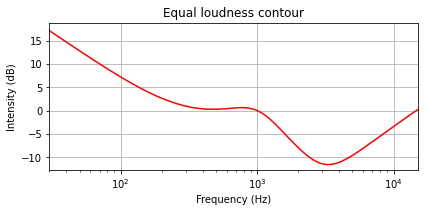

In [2]:
def compute_equal_loudness_contour(freq_min=30, freq_max=15000, num_points=100):
    """Computation of the equal loudness contour

    Notebook: C1/C1S3_Dynamics.ipynb

    Args:
        freq_min (float): Lowest frequency to be evaluated (Default value = 30)
        freq_max (float): Highest frequency to be evaluated (Default value = 15000)
        num_points (int): Number of evaluation points (Default value = 100)

    Returns:
        equal_loudness_contour (np.ndarray): Equal loudness contour (in dB)
        freq_range (np.ndarray): Evaluated frequency points
    """
    freq_range = np.logspace(np.log10(freq_min), np.log10(freq_max), num=num_points)
    freq = 1000
    # Function D from https://bar.wikipedia.org/wiki/Datei:Acoustic_weighting_curves.svg
    h_freq = ((1037918.48 - freq**2)**2 + 1080768.16 * freq**2) / ((9837328 - freq**2)**2 + 11723776 * freq**2)
    n_freq = (freq / (6.8966888496476 * 10**(-5))) * np.sqrt(h_freq / ((freq**2 + 79919.29) * (freq**2 + 1345600)))
    h_freq_range = ((1037918.48 - freq_range**2)**2 + 1080768.16 * freq_range**2) / ((9837328 - freq_range**2)**2
                                                                                     + 11723776 * freq_range**2)
    n_freq_range = (freq_range / (6.8966888496476 * 10**(-5))) * np.sqrt(h_freq_range / ((freq_range**2 + 79919.29) *
                                                                         (freq_range**2 + 1345600)))
    equal_loudness_contour = 20 * np.log10(np.abs(n_freq / n_freq_range))
    return equal_loudness_contour, freq_range

equal_loudness_contour, freq_range = compute_equal_loudness_contour()

libfmp.b.plot_signal(equal_loudness_contour, T_coef=freq_range, figsize=(6,3), xlabel='Frequency (Hz)',
                          ylabel='Intensity (dB)', title='Equal loudness contour', color='red')
plt.xscale('log')
plt.grid()
plt.show()

## Chirp Signal with Equal Power

We now conduct a small experiment, where we consider a chirp signal with exponentially increasing frequency starting with frequency $30~\mathrm{Hz}$ and ending with frequency $10000~\mathrm{Hz}$. First, we generate such a chirp signal with equal intensity throughout the entire time interval. Note that, when listening to this signal, one has the impression that the signal first becomes louder with increasing frequency and, after passing the frequency of roughly $4000~\mathrm{Hz}$ becomes softer again. 

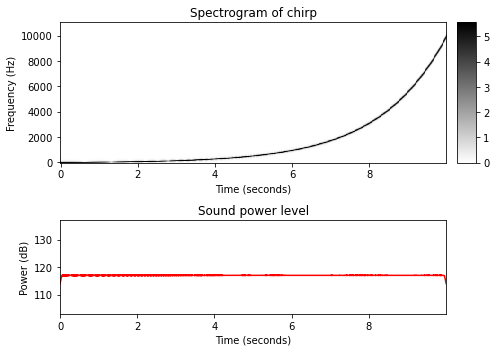

In [3]:
def generate_chirp_exp(dur, freq_start, freq_end, Fs=22050):
    """Generation chirp with exponential frequency increase

    Notebook: C1/C1S3_Dynamics.ipynb

    Args:
        dur (float): Length (seconds) of the signal
        freq_start (float): Start frequency of the chirp
        freq_end (float): End frequency of the chirp
        Fs (scalar): Sampling rate (Default value = 22050)

    Returns:
        x (np.ndarray): Generated chirp signal
        t (np.ndarray): Time axis (in seconds)
        freq (np.ndarray): Instant frequency (in Hz)
    """
    N = int(dur * Fs)
    t = np.arange(N) / Fs
    freq = np.exp(np.linspace(np.log(freq_start), np.log(freq_end), N))
    phases = np.zeros(N)
    for n in range(1, N):
        phases[n] = phases[n-1] + 2 * np.pi * freq[n-1] / Fs
    x = np.sin(phases)
    return x, t, freq

Fs = 22050
freq_start = 30 
freq_end = 10000
dur = 10
x, t, freq = generate_chirp_exp(dur, freq_start, freq_end, Fs=Fs)


fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.05], 
                                          'height_ratios': [3, 2]}, figsize=(7, 5))
N, H = 1024, 512
X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, pad_mode='constant')
libfmp.b.plot_matrix(np.log(1+np.abs(X)), Fs=Fs/H, Fs_F=N/Fs, ax=[ax[0,0], ax[0,1]], 
                     title='Spectrogram of chirp', colorbar=True)

win_len_sec = 0.1
power_db = compute_power_db(x, win_len_sec=win_len_sec, Fs=Fs)
libfmp.b.plot_signal(power_db, Fs=Fs, ax=ax[1,0], 
                          title='Sound power level', ylabel='Power (dB)', color='red')
ax[1,0].set_ylim([103, 137])
ax[1,1].set_axis_off()
plt.tight_layout()
plt.show()

display( Audio(x, rate=Fs) )

## Chirp Signal with Equal Loudness

Second, we adjust the amplitude of the signal according to the equal loudness contour generated above. In this case, the resulting chirp signal seems to have equal loudness when sweeping through the entire frequency range.

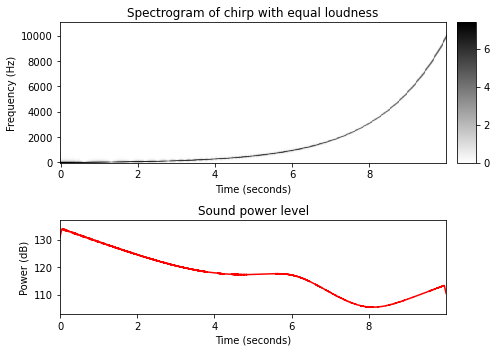

In [4]:
def generate_chirp_exp_equal_loudness(dur, freq_start, freq_end, Fs=22050):
    """Generation chirp with exponential frequency increase and equal loudness

    Notebook: C1/C1S3_Dynamics.ipynb

    Args:
        dur (float): Length (seconds) of the signal
        freq_start (float): Starting frequency of the chirp
        freq_end (float): End frequency of the chirp
        Fs (scalar): Sampling rate (Default value = 22050)

    Returns:
        x (np.ndarray): Generated chirp signal
        t (np.ndarray): Time axis (in seconds)
        freq (np.ndarray): Instant frequency (in Hz)
        intensity (np.ndarray): Instant intensity of the signal
    """
    N = int(dur * Fs)
    t = np.arange(N) / Fs
    intensity, freq = compute_equal_loudness_contour(freq_min=freq_start, freq_max=freq_end, num_points=N)
    amp = 10**(intensity / 20)
    phases = np.zeros(N)
    for n in range(1, N):
        phases[n] = phases[n-1] + 2 * np.pi * freq[n-1] / Fs
    x = amp * np.sin(phases)
    return x, t, freq, intensity

x_equal_loudness, t, freq, intensity = generate_chirp_exp_equal_loudness(dur, freq_start, freq_end, Fs=Fs)

fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.05], 
                                          'height_ratios': [3, 2]}, figsize=(7, 5))
N, H = 1024, 512
X = librosa.stft(x_equal_loudness, n_fft=N, hop_length=H, win_length=N, pad_mode='constant')
libfmp.b.plot_matrix(np.log(1+np.abs(X)), Fs=Fs/H, Fs_F=N/Fs, ax=[ax[0,0], ax[0,1]], 
                     title='Spectrogram of chirp with equal loudness', colorbar=True)

win_len_sec = 0.1
power_db = compute_power_db(x_equal_loudness, win_len_sec=win_len_sec, Fs=Fs)
libfmp.b.plot_signal(power_db, Fs=Fs, ax=ax[1,0], 
                          title='Sound power level', ylabel='Power (dB)', color='red')
ax[1,0].set_ylim([103, 137])
ax[1,1].set_axis_off()
plt.tight_layout()
plt.show()

display( Audio(x_equal_loudness, rate=Fs) )

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> and Tim Zunner.
</div>

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>